# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
## Part I - WeatherPy

#In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

#Your first requirement is to create a series of scatter plots to showcase the following relationships:

#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude

#After each plot add a sentence or too explaining what the code is and analyzing.

#Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

#* Northern Hemisphere - Temperature (F) vs. Latitude
#* Southern Hemisphere - Temperature (F) vs. Latitude
#* Northern Hemisphere - Humidity (%) vs. Latitude
#* Southern Hemisphere - Humidity (%) vs. Latitude
#* Northern Hemisphere - Cloudiness (%) vs. Latitude
#* Southern Hemisphere - Cloudiness (%) vs. Latitude
#* Northern Hemisphere - Wind Speed (mph) vs. Latitude
#* Southern Hemisphere - Wind Speed (mph) vs. Latitude

#After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

#**Optional** You will be creating multiple linear regression plots. To optimize your code, write a function that creates the linear regression plots.

#Your final notebook must:

#* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
#* Perform a weather check on each of the cities using a series of successive API calls.
#* Include a print log of each city as it's being processed with the city number and city name.
#* Save a CSV of all retrieved data and a PNG image for each scatter plot.


In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "imperial"

# Build partial query URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Establish call counter
set = 1
counter = 0


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create lists for df
city_list = []
lats = []
lngs = []
countries = []
cloudiness = []
wind_speeds = []
humidities = []
max_temps = []
dates = []

set = 1
counter = 0

# Commence for loop to loop through cities in the the city list
for city in cities:
    try:
        query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
        initial_response = requests.get(query_url + city.replace(" ","&")).json()
        print(initial_response)
        print(f"Processing Record {counter} of Set {set} | {city}")
        print(json.dumps(initial_response['coord']['lat'], indent=4))
        print(json.dumps(initial_response['coord']['lon'], indent=4))
        print(json.dumps(initial_response['sys']['country'], indent=4))
        print(json.dumps(initial_response['clouds']['all']))
        print(json.dumps(initial_response['wind']['speed']))
        print(json.dumps(initial_response['main']['humidity']))
        print(json.dumps(initial_response['main']['temp_max']))
        print(json.dumps(initial_response['dt']))
        
     
        city_list.append(city)
        lats.append(initial_response['coord']['lat'])
        lngs.append(initial_response['coord']['lon'])
        countries.append(initial_response['sys']['country'])
        cloudiness.append(initial_response['clouds']['all'])
        wind_speeds.append(initial_response['wind']['speed'])
        humidities.append(initial_response['main']['humidity'])
        max_temps.append(initial_response['main']['temp_max'])
        dates.append(initial_response['dt'])
    except:
        print("No city found. Continue...")
    if counter > 40:
        counter = 1
        set += 1
    else:
        counter += 1
        
print("********************\nData Retrieval Complete\n*****************")


{'cod': '404', 'message': 'city not found'}
Processing Record 0 of Set 1 | attawapiskat
No city found. Continue...
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 75.67, 'feels_like': 74.5, 'temp_min': 75.67, 'temp_max': 75.67, 'pressure': 1018, 'humidity': 77, 'sea_level': 1018, 'grnd_level': 1015}, 'wind': {'speed': 13.82, 'deg': 119}, 'rain': {'3h': 0.22}, 'clouds': {'all': 27}, 'dt': 1587665543, 'sys': {'country': 'PF', 'sunrise': 1587654987, 'sunset': 1587695959}, 'timezone': -32400, 'id': 4030556, 'name': 'Rikitea', 'cod': 200}
Processing Record 1 of Set 1 | rikitea
-23.12
-134.97
"PF"
27
13.82
77
75.67
1587665543
{'coord': {'lon': 177.48, 'lat': 64.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 1.18, 'feels_like': -9, 'temp_min': 1, 'temp_max': 1.4, 'pressure': 1026, 'humidity': 84},

{'coord': {'lon': 8.78, 'lat': -0.72}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 91.2, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1009, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 200}, 'clouds': {'all': 20}, 'dt': 1587665545, 'sys': {'type': 1, 'id': 2188, 'country': 'GA', 'sunrise': 1587619212, 'sunset': 1587662743}, 'timezone': 3600, 'id': 2396518, 'name': 'Port-Gentil', 'cod': 200}
Processing Record 15 of Set 1 | port-gentil
-0.72
8.78
"GA"
20
8.05
79
84.2
1587665545
{'coord': {'lon': 81.12, 'lat': 6.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 83.23, 'feels_like': 92.53, 'temp_min': 83.23, 'temp_max': 83.23, 'pressure': 1011, 'humidity': 75, 'sea_level': 1011, 'grnd_level': 1010}, 'wind': {'speed': 1.3, 'deg': 187}, 'rain': {'3h': 0.72}, 'clouds': {'all': 94}, 

{'coord': {'lon': -156.79, 'lat': 71.29}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 19.4, 'feels_like': 9.48, 'temp_min': 19.4, 'temp_max': 19.4, 'pressure': 1021, 'humidity': 85}, 'visibility': 4023, 'wind': {'speed': 8.05, 'deg': 240}, 'clouds': {'all': 90}, 'dt': 1587665547, 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 1587648081, 'sunset': 1587713338}, 'timezone': -28800, 'id': 5880054, 'name': 'Barrow', 'cod': 200}
Processing Record 32 of Set 1 | barrow
71.29
-156.79
"US"
90
8.05
85
19.4
1587665547
{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 18.09, 'feels_like': 9.23, 'temp_min': 18.09, 'temp_max': 18.09, 'pressure': 1023, 'humidity': 90, 'sea_level': 1023, 'grnd_level': 1023}, 'wind': {'speed': 6.2, 'deg': 138}, 'clouds': {'all': 18}, 'dt': 1587665547, 'sys': {'countr

{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 50, 'feels_like': 47.37, 'temp_min': 50, 'temp_max': 50, 'pressure': 1009, 'humidity': 86}, 'wind': {'speed': 3, 'deg': 310, 'gust': 8.99}, 'clouds': {'all': 38}, 'dt': 1587665549, 'sys': {'type': 3, 'id': 2008959, 'country': 'NZ', 'sunrise': 1587670354, 'sunset': 1587707551}, 'timezone': 43200, 'id': 6201424, 'name': 'Mataura', 'cod': 200}
Processing Record 5 of Set 2 | mataura
-46.19
168.86
"NZ"
38
3
86
50
1587665549
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.18, 'feels_like': 48.9, 'temp_min': 52, 'temp_max': 55.99, 'pressure': 1004, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 340}, 'clouds': {'all': 75}, 'dt': 1587665272, 'sys': {'type': 1, 'id': 9545, 'countr

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 23.99, 'feels_like': 13.95, 'temp_min': 23.99, 'temp_max': 23.99, 'pressure': 1013, 'humidity': 93, 'sea_level': 1013, 'grnd_level': 1013}, 'wind': {'speed': 9.35, 'deg': 286}, 'snow': {'3h': 0.15}, 'clouds': {'all': 100}, 'dt': 1587665551, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
Processing Record 21 of Set 2 | qaanaaq
77.48
-69.36
"GL"
100
9.35
93
23.99
1587665551
{'coord': {'lon': -48.65, 'lat': -26.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77.43, 'feels_like': 74.91, 'temp_min': 77, 'temp_max': 78.01, 'pressure': 1016, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1587665295, 'sys': {'type': 1, 'id': 8

{'coord': {'lon': 72.89, 'lat': 2.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 82.47, 'feels_like': 83.82, 'temp_min': 82.47, 'temp_max': 82.47, 'pressure': 1012, 'humidity': 80, 'sea_level': 1012, 'grnd_level': 1011}, 'wind': {'speed': 16.69, 'deg': 254}, 'rain': {'3h': 1.48}, 'clouds': {'all': 89}, 'dt': 1587665553, 'sys': {'country': 'MV', 'sunrise': 1587603645, 'sunset': 1587647541}, 'timezone': 18000, 'id': 1337607, 'name': 'Kudahuvadhoo', 'cod': 200}
Processing Record 36 of Set 2 | kudahuvadhoo
2.67
72.89
"MV"
89
16.69
80
82.47
1587665553
{'coord': {'lon': -63, 'lat': -40.81}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.77, 'feels_like': 63.81, 'temp_min': 70.77, 'temp_max': 70.77, 'pressure': 1008, 'humidity': 47, 'sea_level': 1008, 'grnd_level': 1007}, 'wind': {'speed': 12.28, 'deg': 19}, 'clouds': {'all': 10

{'coord': {'lon': -2.93, 'lat': 35.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 63.57, 'feels_like': 60.98, 'temp_min': 62.6, 'temp_max': 64.4, 'pressure': 1015, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1587665555, 'sys': {'type': 1, 'id': 2380, 'country': 'MA', 'sunrise': 1587619743, 'sunset': 1587667832}, 'timezone': 0, 'id': 2541479, 'name': 'Nador', 'cod': 200}
Processing Record 10 of Set 3 | nador
35.17
-2.93
"MA"
75
8.05
77
64.4
1587665555
{'coord': {'lon': 141.54, 'lat': 42.88}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.89, 'feels_like': 29.34, 'temp_min': 30.2, 'temp_max': 36, 'pressure': 1006, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 75}, 'dt': 1587665556, 'sys': {'type': 1, 'id': 7973, 'country': 'JP

{'cod': '404', 'message': 'city not found'}
Processing Record 24 of Set 3 | ha noi
No city found. Continue...
{'coord': {'lon': 102.27, 'lat': -3.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.3, 'feels_like': 85.35, 'temp_min': 79.3, 'temp_max': 79.3, 'pressure': 1009, 'humidity': 81, 'sea_level': 1009, 'grnd_level': 1007}, 'wind': {'speed': 5.57, 'deg': 356}, 'rain': {'3h': 1.78}, 'clouds': {'all': 99}, 'dt': 1587665558, 'sys': {'country': 'ID', 'sunrise': 1587683337, 'sunset': 1587726528}, 'timezone': 25200, 'id': 1649150, 'name': 'Bengkulu', 'cod': 200}
Processing Record 25 of Set 3 | bengkulu
-3.8
102.27
"ID"
99
5.57
81
79.3
1587665558
{'coord': {'lon': 48.62, 'lat': 62.06}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.98, 'feels_like': 17.31, 'temp_min': 24.98, 'temp_max': 24.98, 'pressure': 997, 'humidity': 94,

{'coord': {'lon': -97.34, 'lat': 37.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.38, 'feels_like': 72.36, 'temp_min': 69.8, 'temp_max': 77, 'pressure': 1007, 'humidity': 53}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 330}, 'clouds': {'all': 1}, 'dt': 1587665536, 'sys': {'type': 1, 'id': 4485, 'country': 'US', 'sunrise': 1587642159, 'sunset': 1587690727}, 'timezone': -18000, 'id': 4281730, 'name': 'Wichita', 'cod': 200}
Processing Record 40 of Set 3 | wichita falls
37.69
-97.34
"US"
1
4.7
53
77
1587665536
{'coord': {'lon': 8.07, 'lat': 62.78}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.8, 'feels_like': 35.83, 'temp_min': 41, 'temp_max': 44.6, 'pressure': 1022, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 270}, 'clouds': {'all': 75}, 'dt': 1587665560, 'sys': {'type': 1, 'id': 1636, 'c

{'coord': {'lon': 106.34, 'lat': 39.23}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 32.16, 'temp_min': 41, 'temp_max': 41, 'pressure': 840, 'humidity': 1}, 'wind': {'speed': 3, 'deg': 90, 'gust': 4}, 'clouds': {'all': 0}, 'dt': 1587665562, 'sys': {'type': 3, 'id': 2000025, 'country': 'CN', 'sunrise': 1587679496, 'sunset': 1587728415}, 'timezone': 28800, 'id': 1794971, 'name': 'Shitanjing', 'cod': 200}
Processing Record 13 of Set 4 | shitanjing
39.23
106.34
"CN"
0
3
1
41
1587665562
{'coord': {'lon': -135.33, 'lat': 57.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 38.39, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1020, 'humidity': 93}, 'visibility': 11265, 'wind': {'speed': 8.05, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1587665562, 'sys': {'type': 1, 'id': 7795, 'country': 'US',

{'coord': {'lon': 124.39, 'lat': 13.78}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 82, 'feels_like': 86.07, 'temp_min': 82, 'temp_max': 82, 'pressure': 1011, 'humidity': 82, 'sea_level': 1011, 'grnd_level': 1010}, 'wind': {'speed': 12.17, 'deg': 42}, 'rain': {'3h': 0.72}, 'clouds': {'all': 5}, 'dt': 1587665564, 'sys': {'country': 'PH', 'sunrise': 1587677040, 'sunset': 1587722208}, 'timezone': 28800, 'id': 1712961, 'name': 'Gigmoto', 'cod': 200}
Processing Record 34 of Set 4 | gigmoto
13.78
124.39
"PH"
5
12.17
82
82
1587665564
{'coord': {'lon': 101.38, 'lat': -2.08}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 65.68, 'feels_like': 66.72, 'temp_min': 65.68, 'temp_max': 65.68, 'pressure': 1010, 'humidity': 73, 'sea_level': 1010, 'grnd_level': 899}, 'wind': {'speed': 1.95, 'deg': 29}, 'rain': {'3h': 0.44}, 'clouds': {'all': 87}, 'dt

{'cod': '404', 'message': 'city not found'}
Processing Record 9 of Set 5 | belushya guba
No city found. Continue...
{'coord': {'lon': 170.31, 'lat': 69.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 10.76, 'feels_like': 2.64, 'temp_min': 10.76, 'temp_max': 10.76, 'pressure': 1026, 'humidity': 86, 'sea_level': 1026, 'grnd_level': 1020}, 'wind': {'speed': 3.87, 'deg': 139}, 'clouds': {'all': 0}, 'dt': 1587665526, 'sys': {'country': 'RU', 'sunrise': 1587657093, 'sunset': 1587720116}, 'timezone': 43200, 'id': 2122090, 'name': 'Pevek', 'cod': 200}
Processing Record 10 of Set 5 | pevek
69.7
170.31
"RU"
0
3.87
86
10.76
1587665526
{'coord': {'lon': -104.83, 'lat': 24.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.98, 'feels_like': 66.51, 'temp_min': 73.98, 'temp_max': 73.98, 'pressure': 1014, 'humidity': 9, 'sea_level': 1014, 'grnd_

{'coord': {'lon': 46.87, 'lat': 56.78}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.52, 'feels_like': 19.99, 'temp_min': 27.52, 'temp_max': 27.52, 'pressure': 1003, 'humidity': 93, 'sea_level': 1003, 'grnd_level': 990}, 'wind': {'speed': 5.55, 'deg': 274}, 'clouds': {'all': 97}, 'dt': 1587665569, 'sys': {'country': 'RU', 'sunrise': 1587605031, 'sunset': 1587658643}, 'timezone': 10800, 'id': 548715, 'name': 'Kilemary', 'cod': 200}
Processing Record 26 of Set 5 | kilemary
56.78
46.87
"RU"
97
5.55
93
27.52
1587665569
{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 63.14, 'feels_like': 61.27, 'temp_min': 60.01, 'temp_max': 66, 'pressure': 1012, 'humidity': 84}, 'wind': {'speed': 8.01, 'deg': 349, 'gust': 15.99}, 'rain': {'3h': 0.45}, 'clouds': {'all': 100}, 'dt': 1587665569, 'sys': {'type'

{'coord': {'lon': 6, 'lat': 5.5}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.16, 'feels_like': 87.98, 'temp_min': 79.16, 'temp_max': 79.16, 'pressure': 1009, 'humidity': 90, 'sea_level': 1009, 'grnd_level': 1008}, 'wind': {'speed': 3.74, 'deg': 222}, 'rain': {'3h': 2.25}, 'clouds': {'all': 100}, 'dt': 1587665571, 'sys': {'country': 'NG', 'sunrise': 1587619541, 'sunset': 1587663748}, 'timezone': 3600, 'id': 2565341, 'name': 'Delta', 'cod': 200}
Processing Record 2 of Set 6 | delta del tigre
5.5
6
"NG"
100
3.74
90
79.16
1587665571
{'coord': {'lon': 74.98, 'lat': 46.84}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 65.52, 'feels_like': 58.1, 'temp_min': 65.52, 'temp_max': 65.52, 'pressure': 1011, 'humidity': 30, 'sea_level': 1011, 'grnd_level': 969}, 'wind': {'speed': 7.16, 'deg': 125}, 'clouds': {'all': 17}, 'dt': 1587665571, '

{'coord': {'lon': 167.48, 'lat': -22.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.11, 'feels_like': 72.68, 'temp_min': 75.11, 'temp_max': 75.11, 'pressure': 1014, 'humidity': 73, 'sea_level': 1014, 'grnd_level': 1008}, 'wind': {'speed': 14.36, 'deg': 134}, 'rain': {'3h': 0.21}, 'clouds': {'all': 49}, 'dt': 1587665573, 'sys': {'country': 'NC', 'sunrise': 1587668775, 'sunset': 1587709793}, 'timezone': 39600, 'id': 2137773, 'name': 'Vao', 'cod': 200}
Processing Record 18 of Set 6 | vao
-22.67
167.48
"NC"
49
14.36
73
75.11
1587665573
{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 38.5, 'feels_like': 29.77, 'temp_min': 34, 'temp_max': 41, 'pressure': 1009, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 150}, 'clouds': {'all': 93}, 'dt': 1587665573, 'sys': {'type': 

{'coord': {'lon': 141.3, 'lat': -2.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.58, 'feels_like': 88.18, 'temp_min': 80.58, 'temp_max': 80.58, 'pressure': 1008, 'humidity': 78, 'sea_level': 1008, 'grnd_level': 1007}, 'wind': {'speed': 2.95, 'deg': 110}, 'rain': {'3h': 0.26}, 'clouds': {'all': 77}, 'dt': 1587665576, 'sys': {'country': 'PG', 'sunrise': 1587673908, 'sunset': 1587717224}, 'timezone': 36000, 'id': 2084442, 'name': 'Vanimo', 'cod': 200}
Processing Record 33 of Set 6 | vanimo
-2.67
141.3
"PG"
77
2.95
78
80.58
1587665576
{'coord': {'lon': -34.81, 'lat': -7.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 90.59, 'temp_min': 86, 'temp_max': 86, 'pressure': 1011, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1587665576, 'sys': {'type'

{'cod': '404', 'message': 'city not found'}
Processing Record 7 of Set 7 | ngukurr
No city found. Continue...
{'coord': {'lon': -46.62, 'lat': -7.36}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.21, 'feels_like': 88, 'temp_min': 83.21, 'temp_max': 83.21, 'pressure': 1008, 'humidity': 64, 'sea_level': 1008, 'grnd_level': 966}, 'wind': {'speed': 4.83, 'deg': 80}, 'rain': {'3h': 2.69}, 'clouds': {'all': 44}, 'dt': 1587665578, 'sys': {'country': 'BR', 'sunrise': 1587632867, 'sunset': 1587675677}, 'timezone': -10800, 'id': 3390581, 'name': 'Riachão', 'cod': 200}
Processing Record 8 of Set 7 | riachao
-7.36
-46.62
"BR"
44
4.83
64
83.21
1587665578
{'coord': {'lon': 159.59, 'lat': -8.14}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 79.74, 'feels_like': 87.24, 'temp_min': 79.74, 'temp_max': 79.74, 'pressure': 1008, 'humidity': 82, 's

{'cod': '404', 'message': 'city not found'}
Processing Record 22 of Set 7 | tsihombe
No city found. Continue...
{'coord': {'lon': 143.2, 'lat': 64.57}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14.32, 'feels_like': 6.78, 'temp_min': 14.32, 'temp_max': 14.32, 'pressure': 1020, 'humidity': 84, 'sea_level': 1020, 'grnd_level': 959}, 'wind': {'speed': 3.18, 'deg': 63}, 'clouds': {'all': 99}, 'dt': 1587665580, 'sys': {'country': 'RU', 'sunrise': 1587666060, 'sunset': 1587724161}, 'timezone': 36000, 'id': 2120048, 'name': 'Ust-Nera', 'cod': 200}
Processing Record 23 of Set 7 | ust-nera
64.57
143.2
"RU"
99
3.18
84
14.32
1587665580
{'coord': {'lon': 40.02, 'lat': 11.18}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72.86, 'feels_like': 71.56, 'temp_min': 72.86, 'temp_max': 72.86, 'pressure': 1013, 'humidity': 42, 'sea_level': 1013

{'coord': {'lon': 71.64, 'lat': 48.68}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 59.31, 'feels_like': 55.08, 'temp_min': 59.31, 'temp_max': 59.31, 'pressure': 1011, 'humidity': 56, 'sea_level': 1011, 'grnd_level': 955}, 'wind': {'speed': 4.88, 'deg': 115}, 'rain': {'3h': 0.18}, 'clouds': {'all': 100}, 'dt': 1587665583, 'sys': {'country': 'KZ', 'sunrise': 1587686722, 'sunset': 1587737843}, 'timezone': 21600, 'id': 1526041, 'name': 'Atasū', 'cod': 200}
Processing Record 38 of Set 7 | atasu
48.68
71.64
"KZ"
100
4.88
56
59.31
1587665583
{'coord': {'lon': 156.12, 'lat': 50.68}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 33.06, 'feels_like': 24.42, 'temp_min': 33.06, 'temp_max': 33.06, 'pressure': 995, 'humidity': 94, 'sea_level': 995, 'grnd_level': 994}, 'wind': {'speed': 8.88, 'deg': 312}, 'snow': {'3h': 2.02}, 'clouds': {'all': 100}, '

{'coord': {'lon': -123.21, 'lat': 39.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.57, 'feels_like': 61.99, 'temp_min': 59, 'temp_max': 72, 'pressure': 1025, 'humidity': 59}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 350}, 'clouds': {'all': 1}, 'dt': 1587665346, 'sys': {'type': 1, 'id': 6129, 'country': 'US', 'sunrise': 1587648225, 'sunset': 1587697078}, 'timezone': -25200, 'id': 5404476, 'name': 'Ukiah', 'cod': 200}
Processing Record 13 of Set 8 | ukiah
39.15
-123.21
"US"
1
6.93
59
72
1587665346
{'coord': {'lon': 108.9, 'lat': 0.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.06, 'feels_like': 86.2, 'temp_min': 78.06, 'temp_max': 78.06, 'pressure': 1008, 'humidity': 87, 'sea_level': 1008, 'grnd_level': 1008}, 'wind': {'speed': 2.77, 'deg': 41}, 'clouds': {'all': 99}, 'dt': 1587665586, 'sys': {'country': 

{'coord': {'lon': -83.97, 'lat': 35.76}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 63, 'feels_like': 56.88, 'temp_min': 61, 'temp_max': 66, 'pressure': 1007, 'humidity': 59}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 180, 'gust': 27.51}, 'clouds': {'all': 90}, 'dt': 1587665538, 'sys': {'type': 1, 'id': 6098, 'country': 'US', 'sunrise': 1587639126, 'sunset': 1587687344}, 'timezone': -14400, 'id': 4639848, 'name': 'Maryville', 'cod': 200}
Processing Record 29 of Set 8 | maryville
35.76
-83.97
"US"
90
10.29
59
66
1587665538
{'coord': {'lon': -6.23, 'lat': 36.59}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 70.41, 'feels_like': 60.71, 'temp_min': 69.8, 'temp_max': 71.6, 'pressure': 1013, 'humidity': 52}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1587665518, 'sys': {'t

{'coord': {'lon': 128.88, 'lat': 46.95}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.86, 'feels_like': 19.69, 'temp_min': 25.86, 'temp_max': 25.86, 'pressure': 1005, 'humidity': 93, 'sea_level': 1005, 'grnd_level': 966}, 'wind': {'speed': 2.84, 'deg': 217}, 'clouds': {'all': 71}, 'dt': 1587665592, 'sys': {'country': 'CN', 'sunrise': 1587673231, 'sunset': 1587723862}, 'timezone': 28800, 'id': 2036237, 'name': 'Langxiang', 'cod': 200}
Processing Record 8 of Set 9 | langxiang
46.95
128.88
"CN"
71
2.84
93
25.86
1587665592
{'cod': '404', 'message': 'city not found'}
Processing Record 9 of Set 9 | ondorhaan
No city found. Continue...
{'coord': {'lon': 102.26, 'lat': 27.9}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 44.96, 'feels_like': 36.25, 'temp_min': 44.96, 'temp_max': 44.96, 'pressure': 1023, 'humidity': 43, 'sea_level': 1

{'coord': {'lon': 14.64, 'lat': 63.18}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 37.4, 'feels_like': 24.31, 'temp_min': 37.4, 'temp_max': 37.4, 'pressure': 1016, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 300}, 'clouds': {'all': 84}, 'dt': 1587665595, 'sys': {'type': 1, 'id': 1774, 'country': 'SE', 'sunrise': 1587611123, 'sunset': 1587668019}, 'timezone': 7200, 'id': 2685750, 'name': 'Östersund', 'cod': 200}
Processing Record 24 of Set 9 | ostersund
63.18
14.64
"SE"
84
16.11
71
37.4
1587665595
{'coord': {'lon': 14.91, 'lat': 68.56}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 36.88, 'feels_like': 31.3, 'temp_min': 32, 'temp_max': 39.99, 'pressure': 1011, 'humidity': 88}, 'wind': {'speed': 4, 'deg': 286}, 'rain': {'3h': 0.21}, 'clouds': {'all': 87}, 'dt': 1587665595, 'sys': {'type': 3, 'id': 20065

{'cod': '404', 'message': 'city not found'}
Processing Record 41 of Set 9 | road town
No city found. Continue...
{'coord': {'lon': 175.52, 'lat': -41.41}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.82, 'feels_like': 49.48, 'temp_min': 55.99, 'temp_max': 59, 'pressure': 1010, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 340}, 'clouds': {'all': 84}, 'dt': 1587665599, 'sys': {'type': 1, 'id': 7358, 'country': 'NZ', 'sunrise': 1587668263, 'sunset': 1587706445}, 'timezone': 43200, 'id': 2206874, 'name': 'Waipawa', 'cod': 200}
Processing Record 1 of Set 10 | waipawa
-41.41
175.52
"NZ"
84
13.87
82
59
1587665599
{'coord': {'lon': 127.47, 'lat': 63.92}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 26.92, 'feels_like': 21.24, 'temp_min': 26.92, 'temp_max': 26.92, 'pressure': 1015, 'humidity': 98, 'sea_level'

{'coord': {'lon': 15.16, 'lat': -26.65}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.6, 'feels_like': 72.09, 'temp_min': 71.6, 'temp_max': 71.6, 'pressure': 1014, 'humidity': 78}, 'wind': {'speed': 8.05, 'deg': 100}, 'clouds': {'all': 19}, 'dt': 1587665601, 'sys': {'type': 1, 'id': 2260, 'country': 'NA', 'sunrise': 1587619172, 'sunset': 1587659721}, 'timezone': 7200, 'id': 3355672, 'name': 'Lüderitz', 'cod': 200}
Processing Record 16 of Set 10 | luderitz
-26.65
15.16
"NA"
19
8.05
78
71.6
1587665601
{'coord': {'lon': 121.14, 'lat': 14.57}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 83.05, 'feels_like': 88.23, 'temp_min': 82, 'temp_max': 84.2, 'pressure': 1010, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1587665601, 'sys': {'type': 1, 'id': 8160, 'country': 'PH', 's

{'coord': {'lon': 13.59, 'lat': 52.68}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 65.01, 'feels_like': 58.66, 'temp_min': 61, 'temp_max': 68, 'pressure': 1018, 'humidity': 28}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 80}, 'clouds': {'all': 15}, 'dt': 1587665604, 'sys': {'type': 1, 'id': 1275, 'country': 'DE', 'sunrise': 1587613752, 'sunset': 1587665894}, 'timezone': 7200, 'id': 2950096, 'name': 'Bernau bei Berlin', 'cod': 200}
Processing Record 30 of Set 10 | bernau
52.68
13.59
"DE"
15
4.7
28
68
1587665604
{'coord': {'lon': 29.66, 'lat': -8.47}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 68.74, 'feels_like': 69.93, 'temp_min': 68.74, 'temp_max': 68.74, 'pressure': 1015, 'humidity': 62, 'sea_level': 1015, 'grnd_level': 909}, 'wind': {'speed': 0.76, 'deg': 266}, 'rain': {'3h': 0.29}, 'clouds': {'all': 22}, 'dt': 1587

{'coord': {'lon': 112.95, 'lat': -2.53}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.36, 'feels_like': 84.4, 'temp_min': 75.36, 'temp_max': 75.36, 'pressure': 1008, 'humidity': 97, 'sea_level': 1008, 'grnd_level': 1007}, 'wind': {'speed': 1.77, 'deg': 107}, 'rain': {'3h': 0.2}, 'clouds': {'all': 92}, 'dt': 1587665608, 'sys': {'country': 'ID', 'sunrise': 1587680704, 'sunset': 1587724035}, 'timezone': 25200, 'id': 1628884, 'name': 'Sampit', 'cod': 200}
Processing Record 6 of Set 11 | sampit
-2.53
112.95
"ID"
92
1.77
97
75.36
1587665608
{'coord': {'lon': 130.64, 'lat': 42.43}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.04, 'feels_like': 29.28, 'temp_min': 39.04, 'temp_max': 39.04, 'pressure': 1009, 'humidity': 71, 'sea_level': 1009, 'grnd_level': 1006}, 'wind': {'speed': 10.58, 'deg': 291}, 'clouds': {'all': 96}, 'dt': 

{'coord': {'lon': -58.74, 'lat': -38.55}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.99, 'feels_like': 57.97, 'temp_min': 64.99, 'temp_max': 64.99, 'pressure': 1014, 'humidity': 60}, 'wind': {'speed': 13, 'gust': 21}, 'clouds': {'all': 96}, 'dt': 1587665610, 'sys': {'type': 3, 'id': 2019717, 'country': 'AR', 'sunrise': 1587637806, 'sunset': 1587676554}, 'timezone': -10800, 'id': 3430443, 'name': 'Necochea', 'cod': 200}
Processing Record 22 of Set 11 | necochea
-38.55
-58.74
"AR"
96
13
60
64.99
1587665610
{'coord': {'lon': 21.78, 'lat': 38.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 52.7, 'feels_like': 39.9, 'temp_min': 46.99, 'temp_max': 59, 'pressure': 1014, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 40}, 'clouds': {'all': 40}, 'dt': 1587665611, 'sys': {'type': 1, 'id': 6641, 'cou

{'cod': '404', 'message': 'city not found'}
Processing Record 39 of Set 11 | marcona
No city found. Continue...
{'coord': {'lon': 29.76, 'lat': -7.03}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 72.41, 'feels_like': 74.53, 'temp_min': 72.41, 'temp_max': 72.41, 'pressure': 1014, 'humidity': 60, 'sea_level': 1014, 'grnd_level': 928}, 'wind': {'speed': 0.58, 'deg': 276}, 'rain': {'3h': 1.63}, 'clouds': {'all': 21}, 'dt': 1587665549, 'sys': {'country': 'CD', 'sunrise': 1587614518, 'sunset': 1587657368}, 'timezone': 7200, 'id': 212962, 'name': 'Port', 'cod': 200}
Processing Record 40 of Set 11 | port victoria
-7.03
29.76
"CD"
21
0.58
60
72.41
1587665549
{'coord': {'lon': -51.18, 'lat': -0.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 87.8, 'feels_like': 96.37, 'temp_min': 87.8, 'temp_max': 87.8, 'pressure': 1011, 'humidity': 7

{'coord': {'lon': 64.63, 'lat': 52.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.02, 'feels_like': 38.26, 'temp_min': 48.02, 'temp_max': 48.02, 'pressure': 1008, 'humidity': 53, 'sea_level': 1008, 'grnd_level': 994}, 'wind': {'speed': 10.92, 'deg': 233}, 'clouds': {'all': 100}, 'dt': 1587665617, 'sys': {'country': 'KZ', 'sunrise': 1587687832, 'sunset': 1587740097}, 'timezone': 21600, 'id': 1519924, 'name': 'Kushmurun', 'cod': 200}
Processing Record 14 of Set 12 | kushmurun
52.45
64.63
"KZ"
100
10.92
53
48.02
1587665617
{'coord': {'lon': 20.97, 'lat': 70.03}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 33.8, 'feels_like': 26.26, 'temp_min': 33.8, 'temp_max': 33.8, 'pressure': 1013, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 50}, 'clouds': {'all': 67}, 'dt': 1587665617, 'sys': {'type': 1, '

{'coord': {'lon': 4.98, 'lat': 43.4}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68, 'feels_like': 62.42, 'temp_min': 68, 'temp_max': 68, 'pressure': 1017, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1587665620, 'sys': {'type': 1, 'id': 6510, 'country': 'FR', 'sunrise': 1587617052, 'sunset': 1587666726}, 'timezone': 7200, 'id': 6447156, 'name': 'Port-de-Bouc', 'cod': 200}
Processing Record 28 of Set 12 | port-de-bouc
43.4
4.98
"FR"
0
9.17
49
68
1587665620
{'coord': {'lon': 119.81, 'lat': 16.29}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.64, 'feels_like': 86.47, 'temp_min': 80.64, 'temp_max': 80.64, 'pressure': 1010, 'humidity': 85, 'sea_level': 1010, 'grnd_level': 995}, 'wind': {'speed': 8.75, 'deg': 46}, 'rain': {'3h': 0.34}, 'clouds': {'all': 81}, 'dt': 1587665620,

{'coord': {'lon': -41.3, 'lat': -21.75}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 79.02, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1015, 'humidity': 57}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1587665623, 'sys': {'type': 1, 'id': 8337, 'country': 'BR', 'sunrise': 1587632415, 'sunset': 1587673575}, 'timezone': -10800, 'id': 3467693, 'name': 'Campos dos Goytacazes', 'cod': 200}
Processing Record 5 of Set 13 | campos sales
-21.75
-41.3
"BR"
40
11.41
57
80.6
1587665623
{'coord': {'lon': 10.85, 'lat': 30.33}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.81, 'feels_like': 64.08, 'temp_min': 72.81, 'temp_max': 72.81, 'pressure': 1013, 'humidity': 18, 'sea_level': 1013, 'grnd_level': 955}, 'wind': {'speed': 7.92, 'deg': 336}, 'clouds': {'all': 0}, 'dt'

{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 83.03, 'temp_min': 86, 'temp_max': 86, 'pressure': 1014, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 21.92, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1587665626, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1587634827, 'sunset': 1587679908}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
Processing Record 20 of Set 13 | bathsheba
13.22
-59.52
"BB"
40
21.92
66
86
1587665626
{'coord': {'lon': 34.83, 'lat': 62.85}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 20.64, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 1008, 'humidity': 97, 'sea_level': 1008, 'grnd_level': 1003}, 'wind': {'speed': 2.82, 'deg': 350}, 'snow': {'3h': 0.32}, 'clouds': {'all': 89}, 'dt':

{'coord': {'lon': -1.85, 'lat': 53.66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.68, 'feels_like': 59.92, 'temp_min': 60.01, 'temp_max': 63, 'pressure': 1020, 'humidity': 54}, 'wind': {'speed': 1.01, 'deg': 68, 'gust': 5.99}, 'clouds': {'all': 90}, 'dt': 1587665628, 'sys': {'type': 3, 'id': 2009191, 'country': 'GB', 'sunrise': 1587617288, 'sunset': 1587669769}, 'timezone': 3600, 'id': 2654993, 'name': 'Mount', 'cod': 200}
Processing Record 36 of Set 13 | mount isa
53.66
-1.85
"GB"
90
1.01
54
63
1587665628
{'coord': {'lon': -20.27, 'lat': 63.44}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 33.42, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 1024, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 150, 'gust': 27.51}, 'clouds': {'all': 75}, 'dt': 1587665628, 'sys': {'type':

{'coord': {'lon': 6.13, 'lat': 62.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.87, 'feels_like': 38.28, 'temp_min': 41, 'temp_max': 44.01, 'pressure': 1022, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3.36}, 'clouds': {'all': 75}, 'dt': 1587665630, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1587613348, 'sunset': 1587669878}, 'timezone': 7200, 'id': 3141667, 'name': 'Roald', 'cod': 200}
Processing Record 10 of Set 14 | roald
62.58
6.13
"NO"
75
3.36
81
44.01
1587665630
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.19, 'feels_like': 19.2, 'temp_min': 27.19, 'temp_max': 27.19, 'pressure': 1017, 'humidity': 98, 'sea_level': 1017, 'grnd_level': 1011}, 'wind': {'speed': 6.6, 'deg': 323}, 'clouds': {'all': 92}, 'dt': 1587665631, 'sys': {'country': 'RU

{'coord': {'lon': 72.97, 'lat': 3.78}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 83.03, 'feels_like': 83.95, 'temp_min': 83.03, 'temp_max': 83.03, 'pressure': 1012, 'humidity': 78, 'sea_level': 1012, 'grnd_level': 1012}, 'wind': {'speed': 17.2, 'deg': 245}, 'rain': {'3h': 4.83}, 'clouds': {'all': 86}, 'dt': 1587665633, 'sys': {'country': 'MV', 'sunrise': 1587603566, 'sunset': 1587647582}, 'timezone': 18000, 'id': 1337605, 'name': 'Mahibadhoo', 'cod': 200}
Processing Record 24 of Set 14 | mahibadhoo
3.78
72.97
"MV"
86
17.2
78
83.03
1587665633
{'coord': {'lon': -90.11, 'lat': 29.85}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}, {'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11d'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 73.98, 'feels_like': 79.21, 'temp_min': 73, 'temp_m

{'coord': {'lon': 44.13, 'lat': 17.49}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 78.48, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1016, 'humidity': 28}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 90}, 'clouds': {'all': 98}, 'dt': 1587665636, 'sys': {'type': 1, 'id': 7421, 'country': 'SA', 'sunrise': 1587609707, 'sunset': 1587655282}, 'timezone': 10800, 'id': 103630, 'name': 'Najrān', 'cod': 200}
Processing Record 38 of Set 14 | najran
17.49
44.13
"SA"
98
9.17
28
84.2
1587665636
{'coord': {'lon': 173.28, 'lat': -41.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 49.53, 'feels_like': 48.06, 'temp_min': 48.99, 'temp_max': 50, 'pressure': 1012, 'humidity': 88}, 'wind': {'speed': 1.01, 'deg': 133, 'gust': 4}, 'clouds': {'all': 13}, 'dt': 1587665594, 'sys': {'type': 3, 'id': 2000215, 'coun

{'coord': {'lon': 38.3, 'lat': 4.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 61.83, 'feels_like': 56.59, 'temp_min': 61.83, 'temp_max': 61.83, 'pressure': 1013, 'humidity': 59, 'sea_level': 1013, 'grnd_level': 821}, 'wind': {'speed': 8.23, 'deg': 131}, 'rain': {'3h': 0.81}, 'clouds': {'all': 93}, 'dt': 1587665639, 'sys': {'country': 'ET', 'sunrise': 1587611870, 'sunset': 1587655917}, 'timezone': 10800, 'id': 331259, 'name': 'Mēga', 'cod': 200}
Processing Record 12 of Set 15 | mega
4.05
38.3
"ET"
93
8.23
59
61.83
1587665639
{'coord': {'lon': 23.43, 'lat': 59.97}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.51, 'feels_like': 39.76, 'temp_min': 46.99, 'temp_max': 50, 'pressure': 1010, 'humidity': 45}, 'wind': {'speed': 8.25, 'deg': 306}, 'clouds': {'all': 67}, 'dt': 1587665639, 'sys': {'type': 3, 'id': 2016390, 'country'

{'coord': {'lon': 33.18, 'lat': -12.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.92, 'feels_like': 58.5, 'temp_min': 61.92, 'temp_max': 61.92, 'pressure': 1016, 'humidity': 56, 'sea_level': 1016, 'grnd_level': 890}, 'wind': {'speed': 4.43, 'deg': 114}, 'clouds': {'all': 6}, 'dt': 1587665643, 'sys': {'country': 'ZM', 'sunrise': 1587613986, 'sunset': 1587656258}, 'timezone': 7200, 'id': 909299, 'name': 'Lundazi', 'cod': 200}
Processing Record 28 of Set 15 | lundazi
-12.29
33.18
"ZM"
6
4.43
56
61.92
1587665643
{'coord': {'lon': 54.09, 'lat': 17.02}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 92.79, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1587665643, 'sys': {'type': 1, 'id': 7562, 'c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_list,
    "Lat": lats,
    "Lng": lngs,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speeds,
    "Humidity": humidities,
    "Max Temp": max_temps,
    "Date": dates}

In [6]:
weather_df = pd.DataFrame(weather_dict)

In [7]:
weather_df

,City,Lat,Lng,Cloudiness,Wind Speed,Humidity,Max Temp,Date
0,rikitea,-23.12,-134.97,27,13.82,77,75.67,1587665543
1,anadyr,64.75,177.48,0,6.71,84,1.40,1587665543
2,aklavik,68.22,-135.01,90,14.99,71,6.80,1587665543
3,bluff,-46.60,168.33,80,3.00,86,50.00,1587665543
4,kapaa,22.08,-159.32,75,13.87,83,75.20,1587665544
...,...,...,...,...,...,...,...,...
534,atherton,53.52,-2.49,92,8.05,48,66.00,1587665644
535,veraval,20.90,70.37,38,11.10,81,79.77,1587665645
536,taoudenni,22.68,-3.98,1,4.88,8,100.42,1587665645
537,hofgeismar,51.48,9.40,20,2.24,28,68.00,1587665646


In [8]:
# Export data into a .csv

weather_df.to_csv(r'output_data\weather_df.csv', encoding="utf-8", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_df.loc[weather_df['Humidity']>100]

,City,Lat,Lng,Cloudiness,Wind Speed,Humidity,Max Temp,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

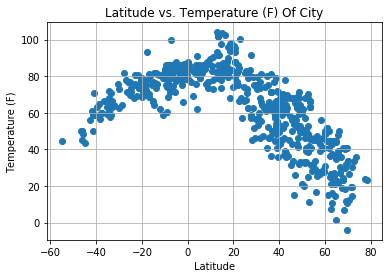

In [13]:
# create lat_temp_df
lat_temp_df = pd.DataFrame({"Lat": lats, "Max Temp": max_temps})

# create scatter plot
plt.scatter(lat_temp_df["Lat"], lat_temp_df["Max Temp"], marker = "o")

# give plot title, y-label, x-label, and a grid behind points
plt.title("Latitude vs. Temperature (F) Of City")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# save the plot
plt.savefig("lat_temp_fig.png")

# show the plot chart
plt.show()

In [14]:
# The temperatures of the cities increase as we travel closer to the equator,
# but the cities at the latitude of ten degrees have the highest temperatures.

## Latitude vs. Humidity Plot

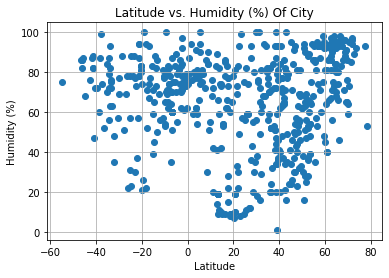

In [15]:
# create lat_hum_df
lat_hum_df = pd.DataFrame({"Lat": lats, "Humidity": humidities})

# create scatter plot
plt.scatter(lat_hum_df["Lat"], lat_hum_df["Humidity"], marker = "o")

# give plot title, y-label, x-label, and a grid behind points
plt.title("Latitude vs. Humidity (%) Of City")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# save the plot
plt.savefig("lat_hum_fig.png")

# show plot
plt.show()

In [16]:
# I created a new data frame with just the information about the cities' 
# latitude coordinates and the percentage of the humidity. More cities in the Northern 
# Hemisphere have a percentage of humidity under 60%.

## Latitude vs. Cloudiness Plot

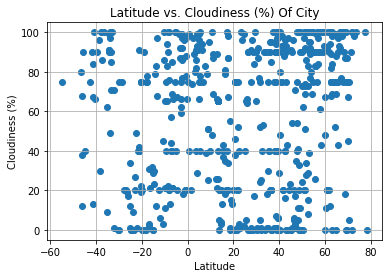

In [17]:
# create lat_cloud_df
lat_cloud_df = pd.DataFrame({"Lat": lats, "Cloudiness": cloudiness})

# create scatter plot 
plt.scatter(lat_cloud_df["Lat"], lat_cloud_df["Cloudiness"], marker = "o")

# give plot title, y-label, x-label, and a grid behind points
plt.title("Latitude vs. Cloudiness (%) Of City")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# save the plot
plt.savefig("lat_cloud_fig.png")

# show plot
plt.show()

In [18]:
# I use my new data frame, lat_cloud_df, to create a scatter plot. By using 
# plt.scatter, I initiate the creation. Then I tell the system that I want to
# use the data from the "Lat" column of that data frame for the X-axis and 
# the data from the "Cloudiness" column of that data frame for the y-axis. Finally,
# I set the city marker as a dot by writing marker = "o".

## Latitude vs. Wind Speed Plot

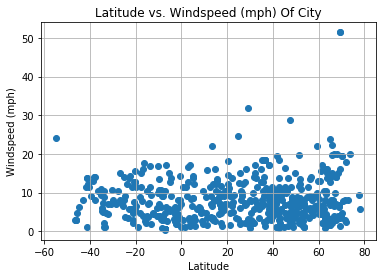

In [19]:
# create lat_wind_df
lat_wind_df = pd.DataFrame({"Lat": lats, "Wind Speed": wind_speeds})

# create scatter plot 
plt.scatter(lat_wind_df["Lat"], lat_wind_df["Wind Speed"], marker = "o")

# give plot title, y-label, x-label, and a grid behind points
plt.title("Latitude vs. Windspeed (mph) Of City")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid(True)

# save the plot
plt.savefig("lat_wind_fig.png")

# show plot
plt.show()

In [20]:
# The majority of the cities windspeeds are within the range of 0-10 MPH.

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

In [25]:
# Create Northern and Southern Hemisphere DataFrames
southern_hemisphere = weather_df.loc[weather_df['Lat']<0]
southern_hemisphere.head()

,City,Lat,Lng,Cloudiness,Wind Speed,Humidity,Max Temp,Date
0,rikitea,-23.12,-134.97,27,13.82,77,75.67,1587665543
3,bluff,-46.60,168.33,80,3.00,86,50.00,1587665543
6,maceio,-9.67,-35.74,40,6.93,70,86.00,1587665317
7,chongwe,-15.33,28.68,29,2.24,59,66.20,1587665544
9,vaini,-21.20,-175.20,40,4.70,94,73.40,1587665544


In [26]:
northern_hemisphere = weather_df.loc[weather_df['Lat']>=0]
northern_hemisphere.tail()

,City,Lat,Lng,Cloudiness,Wind Speed,Humidity,Max Temp,Date
534,atherton,53.52,-2.49,92,8.05,48,66.00,1587665644
535,veraval,20.90,70.37,38,11.10,81,79.77,1587665645
536,taoudenni,22.68,-3.98,1,4.88,8,100.42,1587665645
537,hofgeismar,51.48,9.40,20,2.24,28,68.00,1587665646
538,mandalgovi,45.76,106.27,1,9.75,26,42.82,1587665646


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7122610400103


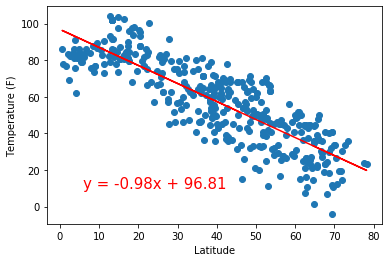

In [27]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# The plot shows 71% of the variability in temperature can be explained 
# by the variablility in latitudinal points. 28% of the temperatures can't
# be explained by the model.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6058257139097625


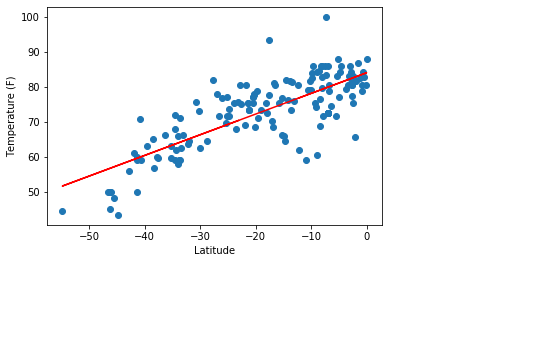

In [28]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# This model can explain the latitude in relation to temperature 61% of the time.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.08027814206593681


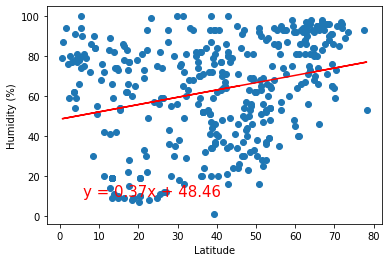

In [29]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# This model is nearly useless when it comes to explaining the relationshil 
# of latitude to humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.002232680003824052


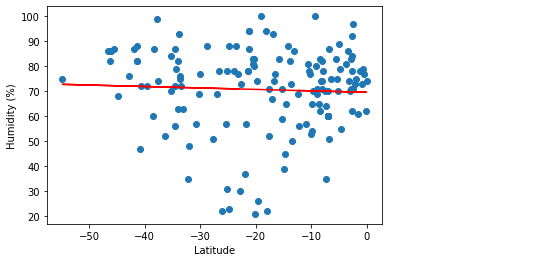

In [31]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# This model three tenths of 1% useful when it comes to explaining the 
# relationship between the latitudinal points in the Southern Hemisphere 
# and the level of humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.025426760202600387


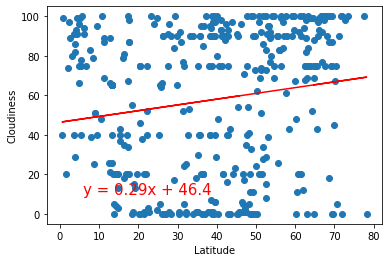

In [32]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# This model is useful three percent of the time when it comes to
# explaining the relationship between cloudiness and the Northern Hempisphere's
# latitudinal points.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0008897122024162059


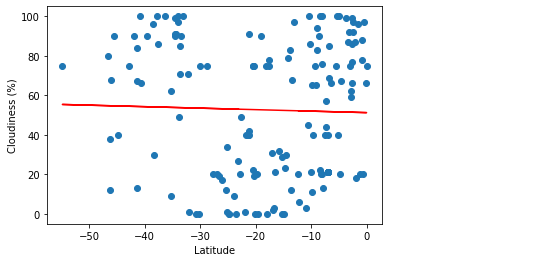

In [33]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# This model is one onehundreth of 1% capabable of explaining the relationship
# between cloudiness and the latitudinal position within the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.0139095328089545


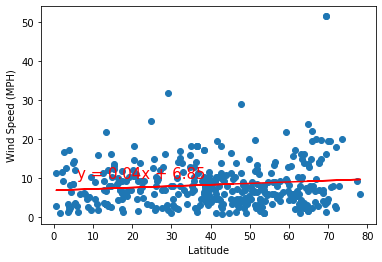

In [34]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# This model is 2% likely to explain the relationship betweein wind speed and
# latitudinal points within the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.052369358461859396


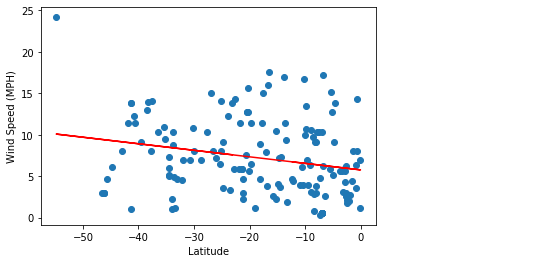

In [35]:
## Convert to floats and store Lat and Max Temp as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# 5% of the time, this model can explain the relationship between wind speed
# and latitudinal points within the Southern Hemisphere.